In [2]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
M=nx.read_gml("polblogs.gml")

In [4]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

#### 1. Create a nice looking graph of the political blog network

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


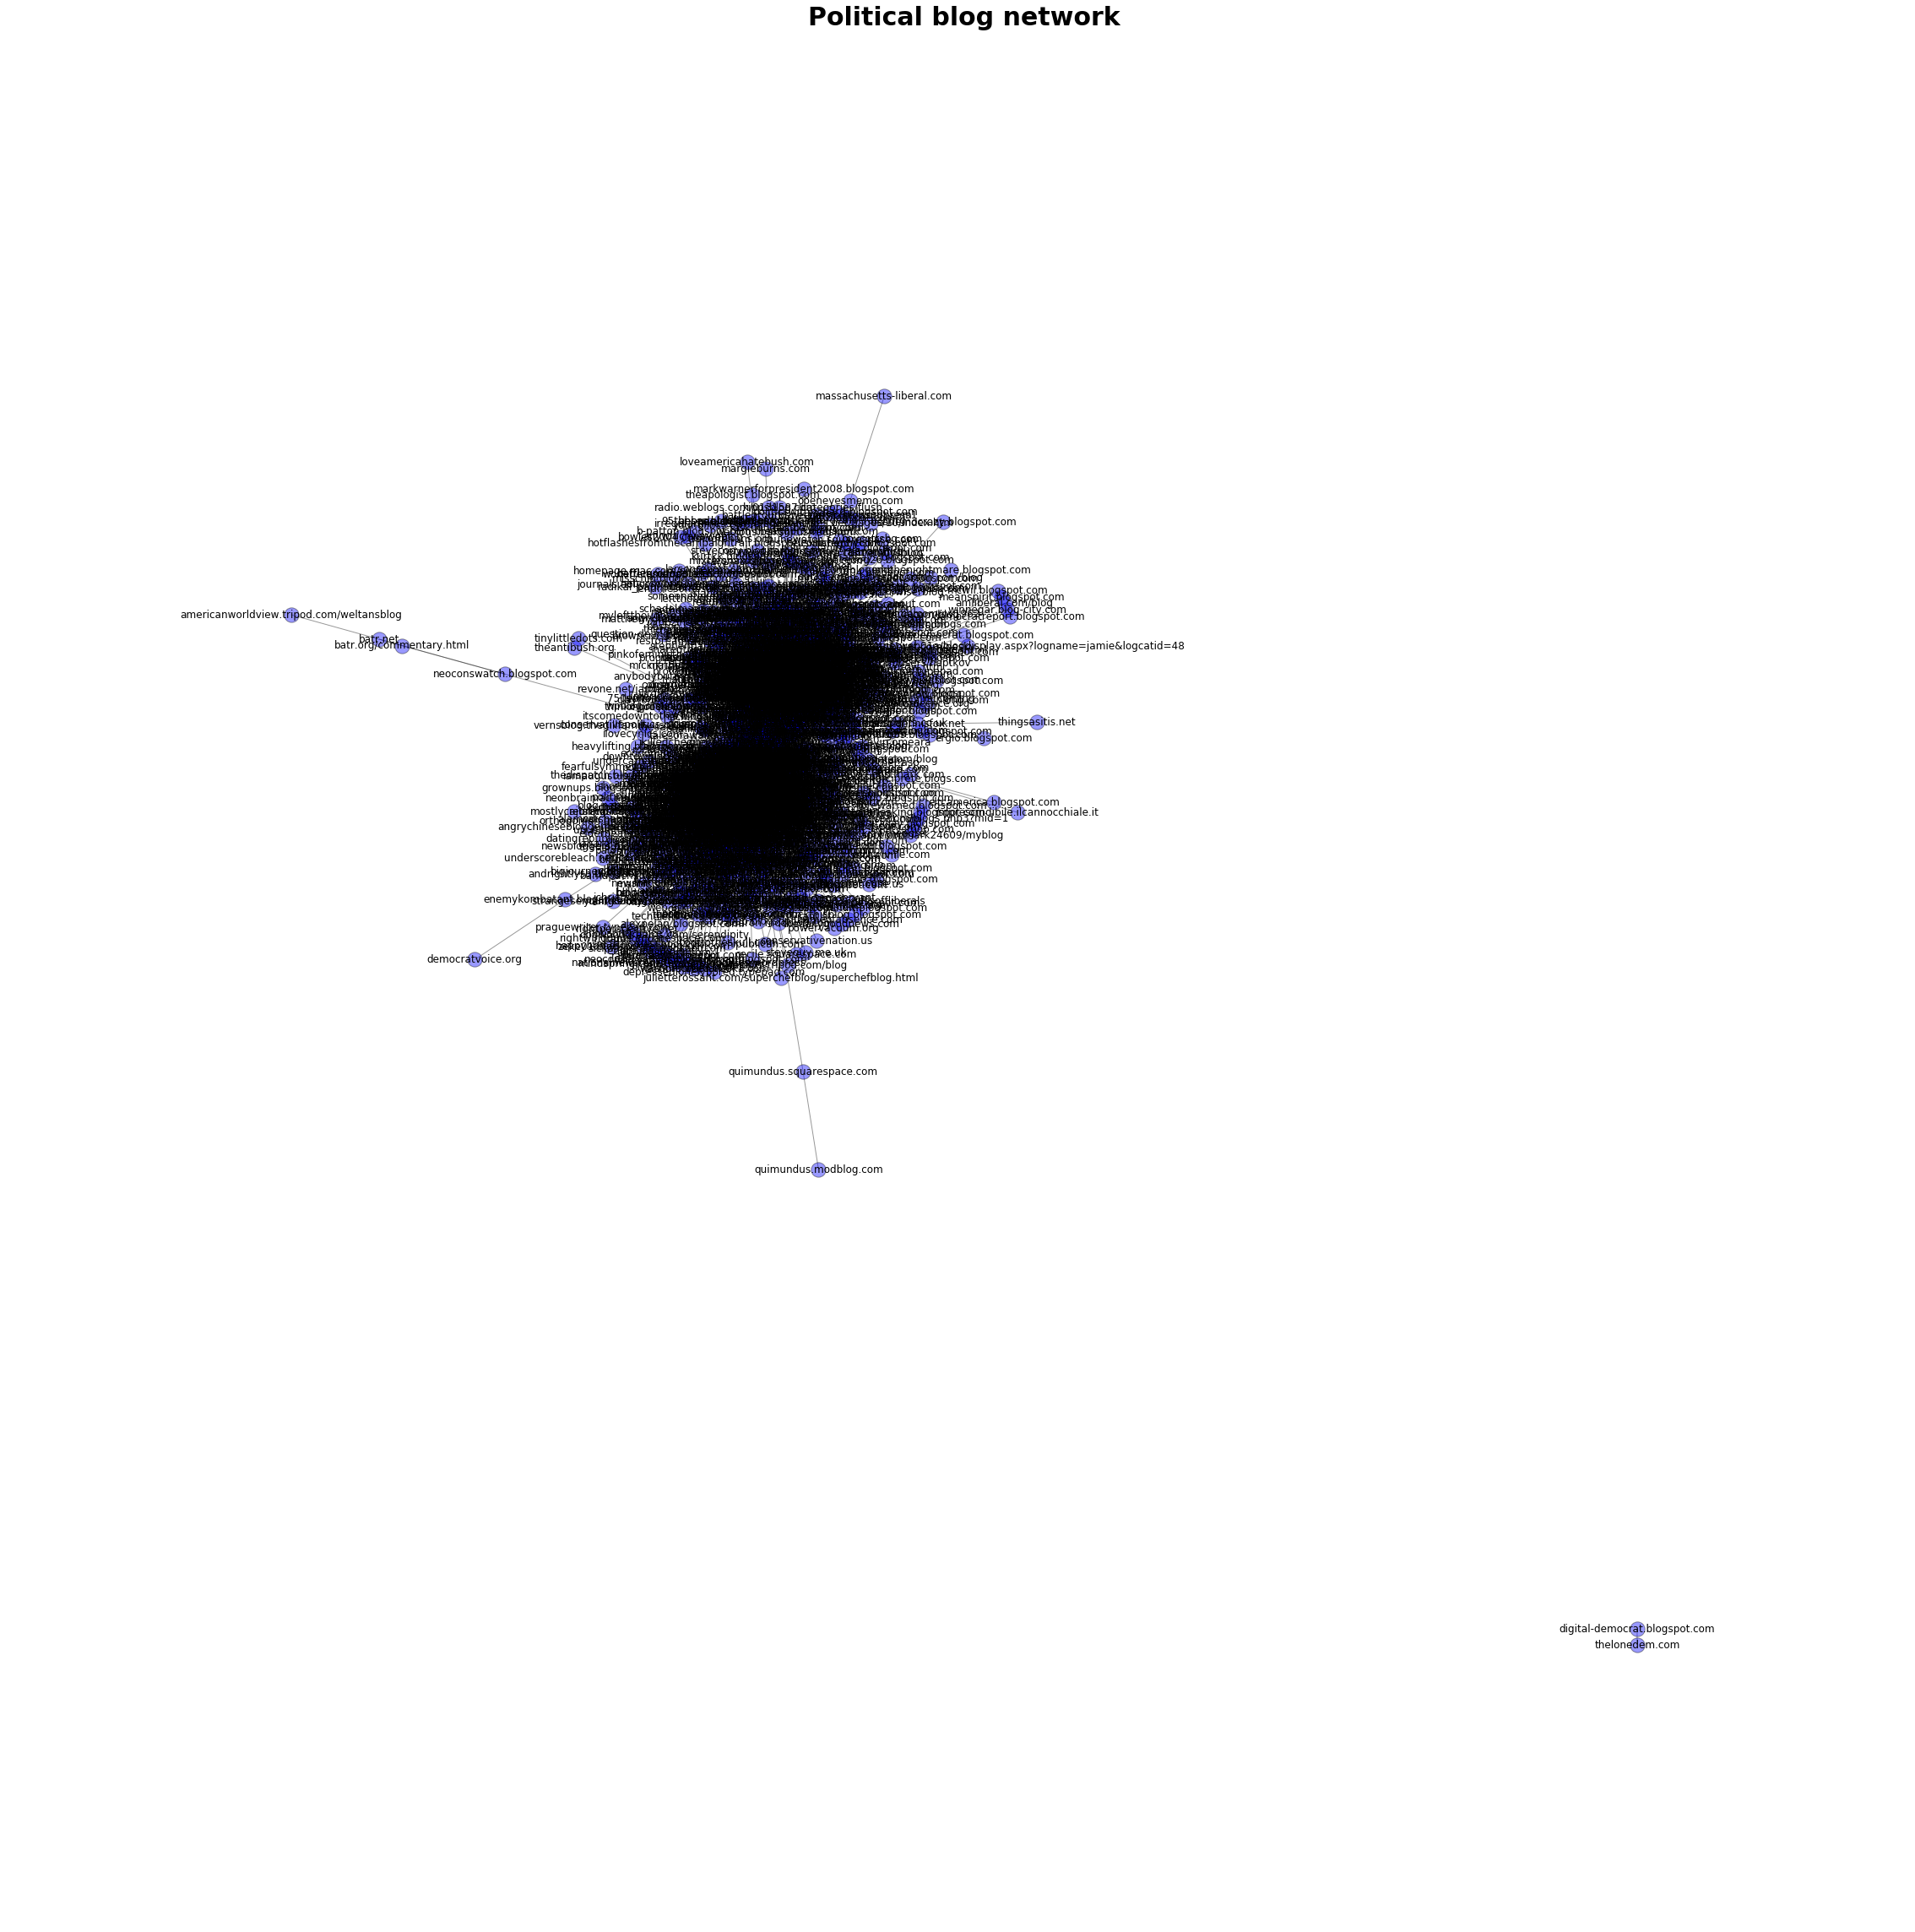

In [5]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

#### 2. What are the 10 most influential blogs?

In [6]:
centrlty= nx.eigenvector_centrality_numpy(G)

In [9]:
List = []
for node in centrlty:
    List.append((node,centrlty[node]))

In [10]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "******10 most influential blogs are:******"
sorted_list_desc[0:10]

******10 most influential blogs are:******


[(u'atrios.blogspot.com', 0.1948229589885677),
 (u'dailykos.com', 0.16090716385818704),
 (u'washingtonmonthly.com', 0.14654050463836452),
 (u'digbysblog.blogspot.com', 0.14265582251978673),
 (u'bodyandsoul.typepad.com', 0.14114853531288896),
 (u'liberaloasis.com', 0.13953785666658589),
 (u'tbogg.blogspot.com', 0.13704857535546855),
 (u'corrente.blogspot.com', 0.1294307313422499),
 (u'talkingpointsmemo.com', 0.1270093107829416),
 (u'dneiwert.blogspot.com', 0.12238703900638014)]

#### 3. What are the 10 least influential blogs?

In [11]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "******10 least influential blogs are:******"
sorted_list_asc[0:10]

******10 least influential blogs are:******


[(u'digital-democrat.blogspot.com', -8.168780624348547e-19),
 (u'thelonedem.com', 1.021068056426643e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.489792408234763e-09),
 (u'quimundus.modblog.com', 6.675725344762987e-08),
 (u'batr.org/commentary.html', 6.794245454784778e-07),
 (u'batr.net', 6.795053204384676e-07),
 (u'democratvoice.org', 1.0221602317211846e-06),
 (u'quimundus.squarespace.com', 6.056497487441401e-06),
 (u'massachusetts-liberal.com', 9.484711746611905e-06),
 (u'thingsasitis.net', 1.1737028626599908e-05)]